#Deep Q Network (DQN)

Mario Fiorino

$\;$

**Introduzione**


L'algoritmo Deep Q-Network (DQN),  rappresenta un'importante innovazione nel campo RL. È stato in grado di risolvere un'ampia gamma di giochi Atari, in alcuni casi superando anche le prestazioni umane.

L'algoritmo è stato sviluppato combinando il classico algoritmo Q-Learning con funzioni neurali profonde (le deep neural networks); ed una tecnica chiamata experience replay. DQN sfrutta l'approccio Semi-gradient TD, calcolando i gradienti tramite backpropagation.

Ref.

https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf


https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf


https://www.tensorflow.org/agents/tutorials/0_intro_rl?hl=it


## Idee di base


DQN sfrutta reti neurali per approssimare in modo non lineare la funzione valore-azione.
In pratica addestriamo una rete neurale, per stimare i valori della funzione valore-azione:  $Q(s, a; w)$. Tale rete neurale è detta anche *Q network*.

L' addestramento avviene minimizzando la seguente Loss:

$\begin{equation}L(w_t) = \mathbb{E}_{s, a, r, s'\sim \rho(.)} \left[ (y_t - Q(s, a; w_t))^2 \right]\end{equation}$

dove:


Il  vettore pesi, ad un certo step, è indicato con $w_t$

Il target : $y_t = r +  \gamma \max_{a^\circ} Q(s', a^\circ ; w_{t})$

$\rho$ rappresenta la behaviour distribution, ovvero la distribuzione di probabilità sulle transizioni $\{s, a, r, s'\}$ raccolte dall'ambiente.

$\;$

Update dei parametri $w$ della rete si ricava sfruttando la differenziazione della funzione di Loss rispetto a questi, pensado $y_t$  come un costante (approccio Semi-gradient ) :

${w}_{t+1} \leftarrow {w}_t + \alpha [ R_{t+1}
 + \gamma \max_{a}  \widehat{q}(s_{t+1},a,{w}_t) - \widehat{q}(s_{t},a_{t},{w}_t)] ∇ \widehat{q}(s_{t},a_{t},{w}_t)    $

Nota : il gradiente $∇ \widehat{q}(s_{t},a_{t},{w}_t)$ può essere calcolato mediante i metodi di backpropagation.

$\;$

In concrento:

per approssimare la funzione di valore-azione, impieghiamo una rete neurale convoluzionale, comunemente conosciuta come **convolutional neural network** (CNN).

Queste sono una tipologia di reti neurali feed-forward che eccellono nell'elaborazione dei dati disposti in una struttura a griglia, tipicamente immagini.
La disposizione dei pixel in un'immagine non è casuale, ma riflette relazioni spaziali tra elementi vicini (i pixel vicini, spesso correlati e forniscono indizi importanti per comprendere il contenuto dell'immagine). Le CNN sono in grado di catturare queste relazioni.

Come ci riescono? La chiave risiede  nell'utilizzo di un processo chiamato convoluzione: in sostanza si fa scorrere un filtro, chiamato anche kernel, che è essenzialmente una piccola matrici 2D di pesi, sull'immagine di input. Man mano che il filtro scorre sull'immagine, si calcola il prodotto scalare tra i pesi del filtro e i pixel dell'immagine che ricadono sotto il filtro stesso.

Una volta che il filtro ha attraversato l'intera immagine, spostandosi passo dopo passo, si ottiene come output una matrice 2D chiamata Feature Map. Questa mappa rappresenta la sintesi delle informazioni estratte dall'immagine mediante il processo di convoluzione.


$FeatureMap[i,j] = \sum_{u=-k} ^k \sum_{v=-k} ^k Filter[u,v] \cdot Image[i-u,j-v]  \;\;\; \forall (i,j) \in Image$



Per approfondimenti e per comprendere meglio il funzionamento delle CNN, consultare i seguenti riferimenti:

Introduzione:

https://twice22.github.io/cnn-introduction/


https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

https://www.cs.cornell.edu/courses/cs6670/2011sp/lectures/lec02_filter.pdf



Convolutions with multiple filters:

https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32

https://www.youtube.com/watch?v=06fMrGaLrDw






$\;$


**Input della Q network** : consiste in un'immagine pixel dello schermo in un certo istante $t$ (snapshot della scena al momento $t$, detto anche "pixel image frame").Tale immagine rappresenta lo stato dell'ambiente in cui opera l'agente. Si noti , la rete in sè svolge autonomamente l'estrazione di feature ("feature construction").


**Output** : restituisce una stima del valore di $Q$ per tutte le azioni disponibili nello stato di ingresso.


$\;$

**Experience Replay**


Il DQN ha introdotto una tecnica chiamata Experience Replay per migliorare la stabilità degli aggiornamenti della rete neurale durante l'apprendimento.

Questa tecnica consiste nell'archiviare le esperienze passate dell'agente in un buffer, detto chiamato buffer di replay (https://www.researchgate.net/figure/Illustration-of-the-replay-buffer-in-the-RL_fig5_346346921).

Durante l'allenamento, dopo ogni step una tupla $(S_{t}, A, R_{t+1}, S_{t+1})$ viene aggiunta nel replay buffer (in sostanza un cyclic buffer data structure). In questo modo, si accumula esperienze provenienti da molteplici episodi. Così, invece di utilizzare solo l'ultima esperienza acquisita per calcolare la Loss e il suo gradiente; si estraggono in modo casuale mini-batch di esperienze dal buffer, e si utilizzano questi batch per aggiornare la rete.

Utilizzando transizioni (estratte in modo casuale) non correlate dal  mini-batch (in pratica utilizzando esperienze non consecutive, si riduce la correlazione temporale tra gli aggiornamenti) ci sono due vantaggi:
- Riduzione della varianza degli aggiornamenti dei pesi.
- Miglioramento della stabilità dell'algoritmo.





$\;$

**Problema della correlazione nell'update dei pesi**: esiste una correlazione tra la funzione valore-azione $Q(s, a; w_t)$ ed il target : $r +  \gamma \max_{a^\circ} Q(s', a^\circ; w_{t})$

Si legge nel testo di Sutton & Barto, 2018 PDF 462:

*As in other methods that bootstrap, the target for a Q-learning update depends on the current action-value function estimate. When a parameterized function approximation method is used to represent action values, the target is a function of the same parameters
that are being updated ...  Its dependence on $w_t$ complicates the process compared to the simpler supervised-learning situation in which the targets do not depend on the parameters  being updated. As discussed in Chapter 11 this can lead to oscillations and/or divergence.*



Soluzione proposta:

L'utilizzo di due reti separate per stimare la funzione valore-azione ed il target. Esattamente definendo il target:

$y_t = r +  \gamma \max_{a^\circ} Q(s', a^\circ; w_{t-τ})$


Cioè si usano i parametri della rete: $w_{t-τ}$ di qualche iterazione precedente a quella attuale $t$ (Nota : $w_{t-τ} \neq w_{t}$  ). In pratica si fa una specie di snapshot dei parametri di rete usati in precedenza. Questa copia è chiamata **target network**.





$\;$

**Convergenza**

Gli autori, Mnih et al.,  dichiarano : *... despite lacking any theoretical convergence guarantees, our method is able to train large neural networks using a reinforcement learning signal and stochastic gradient descent in a stable manner.*

## DQN - Ms Pacman game


$\;$


Per maggiori info sul gioco:

https://gymnasium.farama.org/environments/atari/pacman/


###Moduli

In [ ]:
!pip install gym[atari]
!pip install gym[accept-rom-license]
import gym

import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from collections import deque
import os

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Controllo uso GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

####Rendering

In [ ]:
#codice ispirato:
# https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_02_qlearningreinforcement.ipynb

try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

if COLAB:
  !sudo apt-get install -y xvfb ffmpeg x11-utils
  !pip install -q gym
  !pip install -q 'imageio==2.5.0' # 'imageio==2.4.0'
  !pip install -q PILLOW
  !pip install -q 'pyglet==1.3.2'
  !pip install -q pyvirtualdisplay
  !pip install -q tf-agents
  !pip install -q pygame

In [ ]:
import tf_agents #TF-Agents is just used to render the mountain care environment
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    return env

### Testing Pacman episode

In [ ]:
#env = wrap_env(gym.make("MsPacman-v0",render_mode='human'))
env = wrap_env(gym.make("ALE/MsPacman-v5",render_mode='human'))

#help(env.unwrapped)
print('State space  :', env.observation_space)
print('Action space:', env.action_space,': ', env.get_action_meanings())
print("")

state = env.reset()

    # NOTA
    #print(f"State shape ={(state.shape)}") # (210, 160, 3)
    # ovvero:
    # 3 elementi nell'axis 2:  [0, 0, 0]
    # 160 elemnti nell'axis 1 : [[0, 0, 0],[0, 0, 0],...,[0 0 0]]
    # 210 nell'axis 0 : [ [[]], ... , [[]]
    # Possiamo anche dire che abbiamo 210 matrici a 160 righe e 3 colenne

    # state:
    #[[[  0   0   0]
    # [  0   0   0]
    # [  0   0   0]
    # ...
    # [  0   0   0]
    # [  0   0   0]
    # [  0   0   0]]

    #[[228 111 111]
    # [228 111 111]
    # [228 111 111]
    # ...
    # [228 111 111]
    # [228 111 111]
    # [228 111 111]]
    # ...
    # [[  0   0   0]
    # [  0   0   0]
    # [  0   0   0]
    # ...
    # [  0   0   0]
    # [  0   0   0]
    # [  0   0   0]]]

done = False

i = 0
t_r = 0
while not done:

    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    t_r += reward

    # Debug
    if i % 100 == 0 or reward != 0 :
      print(f"Step {i}: Info{info}, Reward={reward}, Action={action}")

    i += 1

    if done == True:
      print(f" \n - Terminal state occurs in\n   Step {i}:  Tot Reward={t_r}")

env.close()

In [ ]:
show_video()

###Preprocess the game screen

Motivazioni:

L'impiego diretto dell'immagine grezza (210 x 160 x 3 pixel) della schermata di gioco come input per la rete presenta un certo impegno computazionale, che ostacola e rallenta l'efficienza dell'apprendimento.

Soluzione:

Per far fronte a tale problema, viene implementato un processo di pre-elaborazione dell'immagine della schermata di gioco prima di fornirla al DQN. Questo processo consta delle fasi:

- Crop and resize

- Convert to grayscale

- Normalize

- Reshape (to 88 x 80 x 1)

La funzione preprocess_state racchiude il processo di pre-elaborazione descritto. Essa riceve come:

**Input preprocess_state**: lo stato del gioco (l'immagine della schermata di gioco grezza) ---> **Output preprocess_state**: restituisce lo stato del gioco proccessata (un immagine normalizzata 88 x 80 x 1)








In [ ]:
#codice ispirato :
#https://github.com/PacktPublishing/Deep-Reinforcement-Learning-with-Python/blob/master/09.%20%20Deep%20Q%20Network%20and%20its%20Variants/9.03.%20Playing%20Atari%20Games%20using%20DQN.ipynb

color = np.array([210, 164, 74]).mean() # 149.33

def preprocess_state(state):

    #crop  - resize the image
    image = state[1:176:2, ::2]  # (88, 80, 3)

    #convert the image to greyscale
    image = image.mean(axis=2)

    #improve image contrast
    image[image==color] = 0

    #normalize the image
    image = (image - 128) / 128 - 1

    #reshape the image
    image = np.expand_dims(image.reshape(88, 80, 1), axis=0)

    return image  # (1, 88, 80, 1)

(210, 160, 3)


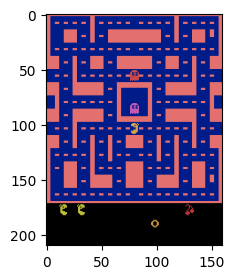


(88, 80, 1)


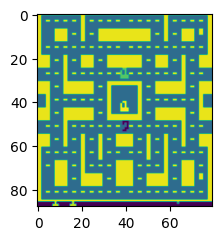

In [ ]:
#Test

env = gym.make("ALE/MsPacman-v5")

#Originale
state = env.reset()
print(state.shape)
plt.figure(figsize=(3,3))
plt.imshow(env.render('rgb_array'))
plt.show()
print("")

#Dopo il processo
pr_i = preprocess_state(state)
pr_i = pr_i.squeeze(axis=0)
print(pr_i.shape)
plt.figure(figsize=(2.5,2.5))
plt.imshow(pr_i)
plt.show()

env.close()


###Build the deep Q network

 **Input della Rete** : Stato del gioco (di fatto l'immagine della schermata di gioco processata) --->  **Output della Rete**: i valori di $Q$ di tutte le azioni nello stato dato in input.

In [ ]:
class DQN:
    def __init__(self, state_size, action_size):

        self.state_size = state_size
        self.action_size = action_size

        # Definiammo il replay buffer
        # Deque (Doubly Ended Queue) tale struttura dati
        # è preferibile rispetto a un elenco nei casi in cui
        # abbiamo bisogno di operazioni di accodamento e pop più veloci da entrambe le estremità del conteiner
        self.replay_buffer = deque(maxlen=batch_size*8) # il replay_buffer ha una lunghezza limitata, che
        # un volta  riempita, l'aggiunta di un altro elemento in coda comporta  uno shift di tutti gli
        # elementi in avanti, e la cancellazione dell'elemento in testa.

        #Discount factor
        self.gamma = 0.99

        #main network
        self.main_network = self.build_network()

        #target network
        self.target_network = self.build_network()

        # Copia weights dalla main q network alla target network
        # Nota: model.set_weights() consente di trasferire i parametri da un modello
        # a un altro modello.
        self.target_network.set_weights(self.main_network.get_weights())


    #Definiamo una funzione chiamata build_network che è la nostra CNN.
    #
    # Note:
    # 1. Per quanto riguarda inizilizzazione dei pesi:
    # kernel_initializer: If None, the default initializer ("glorot_uniform") will be used
    # https://keras.io/api/layers/convolution_layers/convolution2d/
    # https://keras.io/api/layers/initializers/#glorotuniform-class
    # https://github.com/keras-team/keras/blob/62d097c4ff6fa694a4dbc670e9c7eb9e2bc27c74/keras/layers/core.py#L798
    #
    # 2. Per quanto riguarda applicazione di più filtri all'immagine di input, ovvero :
    # model.add(Conv2D(filters,..) , con filters = n > 1
    # Si tratta di applicare "n" filtri a un'immagine, ottenendo in unscita "n" matrici (feature maps).
    # Alla fine, su ogniuna di questa sarà applicata una la funzione Relu : model.add(Activation('relu'))
    # producendo in concreto "n" matrici (feature maps), i cui valori sono tutti maggiori od uguali a 0 (effetto Relu).
    # Perchè usare più filtri?
    # Aumentando il numero di filtri, ognuno dei quali apprenderà pesi diversi in modo indipendente,
    # si aumenta la capacità del modello di apprendere funzioni complesse dai dati.

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(8, (8, 8), strides=4, padding='same', input_shape=self.state_size)) # suggeriti: filters = 32
        model.add(Activation('relu'))

        model.add(Conv2D(16, (4, 4), strides=2, padding='same')) # 64
        model.add(Activation('relu'))

        model.add(Conv2D(32, (3, 3), strides=1, padding='same')) # 64
        model.add(Activation('relu'))
        model.add(Flatten())


        model.add(Dense(256, activation='relu'))  #512
        model.add(Dense(self.action_size, activation='linear'))

        model.compile(loss='mse', optimizer=Adam())

        return model

    #La funzione store_transition memorizza le informazioni della transizione
    #nel replay buffer.
    def store_transistion(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

    # Exploration-exploitation trade off:  Epsilon-greedy policy
    def epsilon_greedy(self, state, epsilon):

       Q_values = self.main_network.predict(state, verbose=0)
       # Note : The verbosity of model.fit() and model.predict() are controlled separately by their own verbose argument
       greedy_act = np.argmax(Q_values[0])

       if random.uniform(0,1) > epsilon: # policy greedy
            return greedy_act
       else:
            non_greedy_actions = list(set(range(self.action_size)) - {greedy_act}) # [0, 2, 3, 4, 5, 6, 7, 8]
            action = np.random.choice(non_greedy_actions) # policy random non-greedy
            return action

    #Fase di Training
    def train(self, batch_size):

        #Campiona random un singolo mini batch dal replay buffer
        minibatch = random.sample(self.replay_buffer, batch_size)
        # minibatch è una lista; len(minibatch) = batch_size, e
        # il numero di "batch_size" tuple: minibatch[0], minibatch[1], ...
        # ogniuna con questa struttura : (state, action, reward, next_state, done).
        # Ad esempio se volessi accedere al reward della tupla nella posizione 4:
        # minibatch[3][2] = 10.0
        #
        #Il loop sottostatne scorre su ogni tupla presente nella lista minibatch:
        # partendo dalla prima tupla: minibatch[0], ne prende il valore dei sui elementi:
        # state, action, reward, next_state, done
        # e calcola la target_Q, ovvero il massimo valore che da la Q.target_network nel 'next_state'
        # addizionato al reward ottenuto entrando in tale stato,
        # poi la Q_values, e conclude con il fit-training.
        # Poi passa alla tupla sucessiva:  minibatch[1], e ripete la sequenza
        for state, action, reward, next_state, done in minibatch:
            if not done:
                target_Q = (reward + self.gamma * np.amax(self.target_network.predict(next_state, verbose=0)))
            else:
                target_Q = reward

            Q_values = self.main_network.predict(state, verbose=0)
            # Q_values= [[2.18,  1.10,  120.29,  11.99, 12.21, 119.57, 15.33, 1.8, 8.9 ]]

            #Otteniamo la Q_values da usare come target nel training.
            #Per avere un target appropriato, imponiamo alla Q.main_network che, nello stato corrente ('state'),
            # l'azione estratta ('action') debba produrre il valore target_Q
            Q_values[0][action] = target_Q

            # Qui avviene il proceso di training della main network.
            # Facendo riferimento ai cenni di teoria scritti sopra,
            # tale istruzione consente l'update dei pesi minimizzando la loss L(w)
            self.main_network.fit(state, Q_values, epochs=1, verbose=0) # .fit(input data, target, epochs, ...)


    #Aggiorna i parametri(pesi) della target network copiandoli dalla main q network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())



Nota:

Generalmente le CNN, fanno uso della tecnica detta Pooling, per maggiori info:

https://www.researchgate.net/figure/Pooling-layer-operation-oproaches-1-Pooling-layers-For-the-function-of-decreasing-the_fig4_340812216

https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/


Un'operazione di Pooling, riduce le dimensioni dei dati ed i costi computazionali.

Questa tecnica è spesso usata in attività come il rilevamento di oggetti in immagini: in cui vogliamo sapere se l'oggetto desiderato è presente nell'immagine e non ci interessa esattamente la sua posizione nell'immagine. Il motivo di tale utilizzo risiede sia nella sua efficenza computazionale, ma anche perchè il Pooling rende la risposta della CNN meno sensibile alla posizione delle l'oggetto nell'immagine (“local translation invariance”).

$\;$

Nel nostro scenario, l'aggiunta di operazioni di Pooling dopo ogni strato convoluzionale, ha determinato un calo delle prestazioni del modello, rispetto a un modello senza Pooling. Pertanto non è stata usata.

### Parameters


In [ ]:
#A causa di limitazioni computazionali, i parametri utilizzati in questa
# sperimentazione sono da considerarsi indicativi.

num_episodes =  100 # 500

batch_size = 6  # 8

eps = 0.2
eps_decay = 0.03

update_rate_target = 300  # 700


### Train Pacman

In [ ]:
env = gym.make("ALE/MsPacman-v5")

action_size = env.action_space.n
state_size = (88, 80, 1)

dqn = DQN(state_size, action_size)

#info sul modello
dqn.main_network.summary()

In [ ]:
#info sul modello
#dqn.main_network.summary()
time_step = 0
train_is_start = False
episode_rewards = [] # struttura dati che ci servirà per il grafico che valuterà le prestazioni del training

#Per ogni episodio...
for i in range(1,num_episodes+1):

    #Epsilon decay, ovvero -> converge ad una policy greedy
    if i % (num_episodes/4)==0:
      eps -= eps_decay
      #Salva la rete nel formato file HDF5
      save_path = "."
      dqn.main_network.save(os.path.join(save_path,"myDQN.h5"))
      print("Ep",i," Model Saved")

    Return = 0 # reward totale accumulato
    done = False


    #preprocessa lo stato iniziale
    state = preprocess_state(env.reset())

    while done == False:

        #update il time step
        time_step += 1

        action = dqn.epsilon_greedy(state,eps)

        next_state, reward, done, info = env.step(action)

        next_state = preprocess_state(next_state)

        #memorizzare le informazioni sulla transizione
        dqn.store_transistion(state, action, reward, next_state, done)

        state = next_state
        Return += reward

        #Se l'episodio è finito, fai il debug e salva i dati per il grafico
        if done:
            print('Episode: ',i)
            print(f" - Terminal state occurs at\n  Step {time_step} - Tot Reward={Return}")
            episode_rewards.append(Return)

        #Verifica se il numero di transizioni nel replay buffer è maggiore
        # della dimensione del batch, se così allora addestra la rete

        if len(dqn.replay_buffer) > (batch_size + (batch_size/2)) :
            dqn.train(batch_size)
            train_is_start = True

        #Update della target network
        #Per motivo vedi sopra: Problema della correlazione nell'update dei pesi
        if (train_is_start == True) and (time_step % update_rate_target == 0):
        # I parametri vengono copiati ogni "update_rate_target" step dalla main_network.
            dqn.update_target_network()


env.close()
print("\n...End of training...\n")



#### Plot

In [ ]:
plt.figure(figsize=(3, 3))
print(episode_rewards)
plt.plot(episode_rewards)
plt.ylabel("Rewards")
plt.xlabel("Episodes")
plt.title("DQN")

#### Test - singolo campione con rendering

In [ ]:
env = wrap_env(gym.make("ALE/MsPacman-v5",render_mode='human'))

state = env.reset()

done = False

i = 0
t_r = 0

while not done:

    state = preprocess_state(state)
    action = dqn.epsilon_greedy(state, 0.0) # con epsilon=0.0 agisce greedy

    state, reward, done, _ = env.step(action)
    t_r += reward
    i += 1

    if done == True:
      print(f" - Terminal state occurs in\n   Step {i} -- Tot Reward {t_r}")

env.close()

### Test - su 100 campioni

In [ ]:
def test(env):

   state = env.reset()
   done = False

   t_r = 0

   while not done:

      state = preprocess_state(state)
      action = dqn.epsilon_greedy(state, 0.0) # con epsilon=0.0 agisce greedy

      state, reward, done, _ = env.step(action)

      t_r += reward

   return t_r


#######################

env = gym.make("ALE/MsPacman-v5")
r_list = []

for j in range(1,101):
  s = test(env)
  r_list.append(s)

env.close()

##########################


max_value = max(r_list)
min_value = min(r_list)
mean_value = sum(r_list) / len(r_list)

print("Maximum value:", max_value)
print("Minimum value:", min_value)
print("Mean value:", mean_value)

###Riferimenti sperimentali

Facendo riferimento al paper di Van Hasselt et al.

https://arxiv.org/pdf/1509.06461

dove viene riportata una tabella con i risultati delle loro sperimentazione nel dominio di Atari.

Per Pacman abbiamo: *Raw scores for the no-op evaluation condition (5 minutes emulator time): each evaluation
episode starts by executing a special no-op action that does not affect the environment up to 30 times, to provide different starting points for the agent* , con diverse modalità:

\begin{array}{ccc}
\text{Random}&\text{Human}&\text{DQN}&\text{Double DQN}\\
307.30&15693.40&2311.00&3210.00
\end{array}

